In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-img/images.jpg
/kaggle/input/new-img/face_eczema-1031985760.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/polymorphous-light-eruption-33.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/milia-11.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/pseudo-porphyria-2.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/sun-damaged-skin-12.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/phototoxic-reactions-72.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/melasma-34.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/vitiligo-4.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/milia-3.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/porphyrias-51.jpg
/kaggle/input/dermnet/test/Light Diseases and Disorders of Pigmentation/erythema-ab-ig

In [2]:
import pathlib
data_dir = pathlib.Path("/kaggle/input/dermnet/train")

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

15557


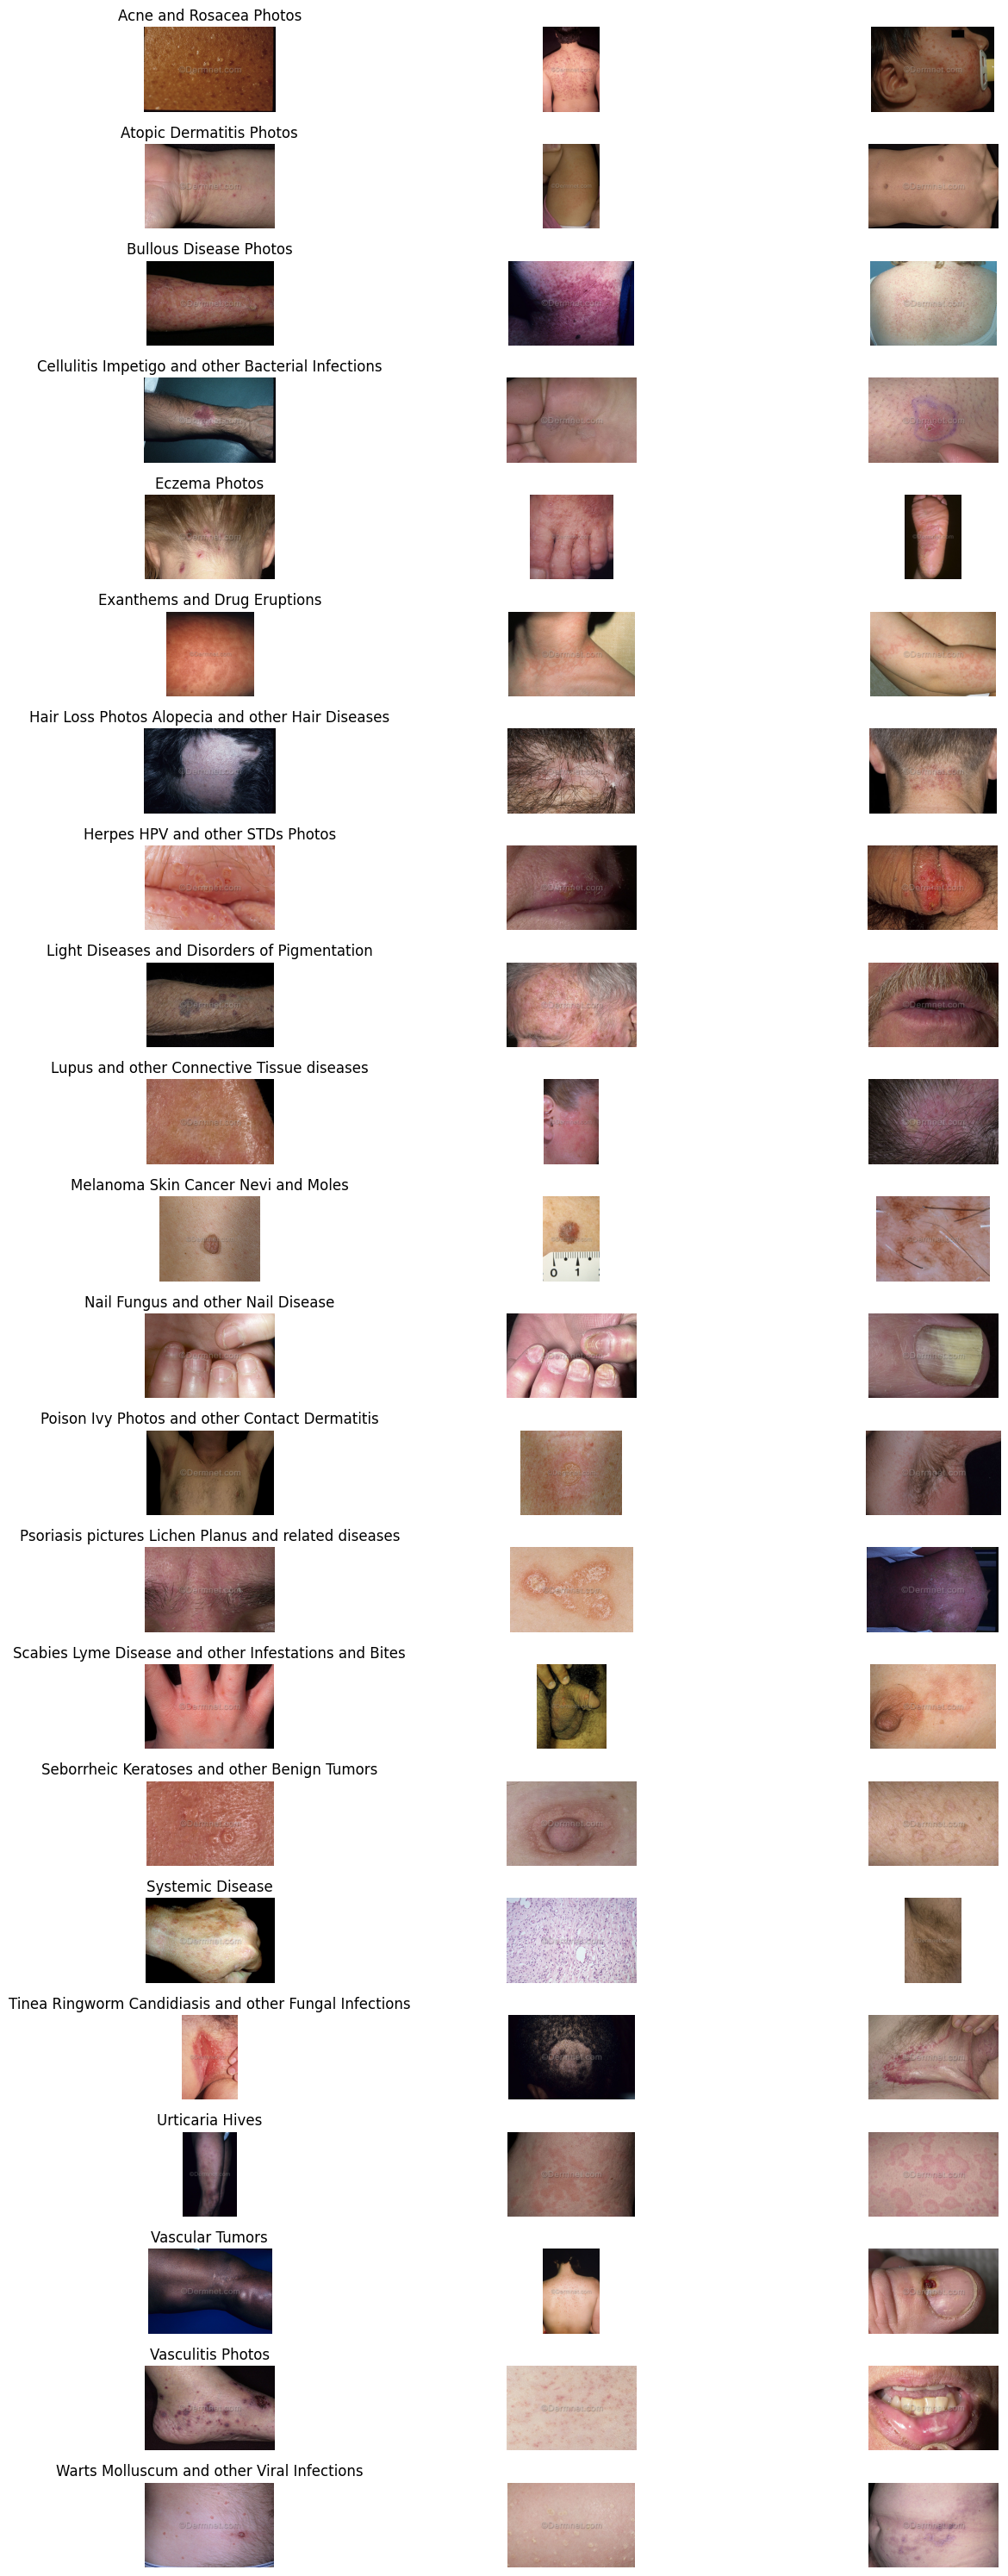

In [4]:
import PIL
import matplotlib.pyplot as plt
from pathlib import Path

# Define the directories and number of images to display
data_dir = Path("/kaggle/input/dermnet/train")
dirs = ["Acne and Rosacea Photos", "Atopic Dermatitis Photos", "Bullous Disease Photos","Cellulitis Impetigo and other Bacterial Infections","Eczema Photos","Exanthems and Drug Eruptions","Hair Loss Photos Alopecia and other Hair Diseases","Herpes HPV and other STDs Photos","Light Diseases and Disorders of Pigmentation","Lupus and other Connective Tissue diseases","Melanoma Skin Cancer Nevi and Moles","Nail Fungus and other Nail Disease","Poison Ivy Photos and other Contact Dermatitis","Psoriasis pictures Lichen Planus and related diseases","Scabies Lyme Disease and other Infestations and Bites","Seborrheic Keratoses and other Benign Tumors","Systemic Disease","Tinea Ringworm Candidiasis and other Fungal Infections","Urticaria Hives","Vascular Tumors","Vasculitis Photos","Warts Molluscum and other Viral Infections"]
num_images = 3

# Create a figure with subplots
fig, axes = plt.subplots(len(dirs), num_images, figsize=(15, 30))

# Loop over the directories and images to display
for i, d in enumerate(dirs):
    image_paths = list((data_dir / d).glob("*"))
    for j in range(num_images):
        # Open the image using PIL and display it on the subplot
        img = PIL.Image.open(str(image_paths[j]))
        axes[i, j].imshow(img)
        axes[i, j].axis("off")
        # Add a title to the subplot with the directory name
        if j == 0:
            axes[i, j].set_title(d)
        
# Adjust the spacing and layout of the subplots
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.show()


In [5]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
     image_size=(256,256),
  subset="training",
  seed=123)

Found 15557 files belonging to 23 classes.
Using 12446 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
    image_size=(256,256),
  subset="validation",
  seed=123)

Found 15557 files belonging to 23 classes.
Using 3111 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


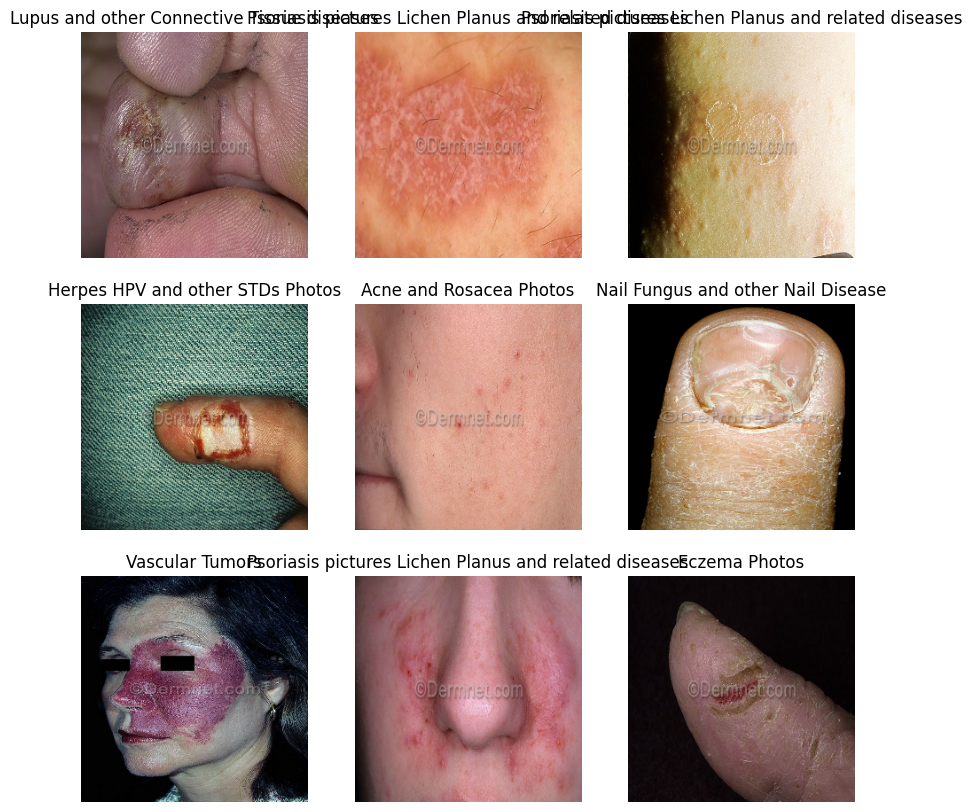

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
normalization_layer = layers.Rescaling(1./255)

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [14]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy',f1_m,precision_m, recall_m])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [18]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
389/389 [==============================] - 607s 2s/step - loss: 2.8732 - accuracy: 0.1444 - f1_m: 3.2217 - precision_m: 20154242.0000 - recall_m: 7.7856 - val_loss: 2.8151 - val_accuracy: 0.1733 - val_f1_m: 2.6160 - val_precision_m: 1.5893 - val_recall_m: 7.4305
Epoch 2/10
389/389 [==============================] - 563s 1s/step - loss: 2.6459 - accuracy: 0.2120 - f1_m: 2.5826 - precision_m: 1.5414 - recall_m: 8.0713 - val_loss: 2.7542 - val_accuracy: 0.2163 - val_f1_m: 2.2768 - val_precision_m: 1.3136 - val_recall_m: 8.5662
Epoch 3/10
389/389 [==============================] - 564s 1s/step - loss: 2.3443 - accuracy: 0.3015 - f1_m: 2.3409 - precision_m: 1.3587 - recall_m: 8.5303 - val_loss: 2.7703 - val_accuracy: 0.2215 - val_f1_m: 2.2274 - val_precision_m: 1.2863 - val_recall_m: 8.3240
Epoch 4/10
389/389 [==============================] - 569s 1s/step - loss: 1.8996 - accuracy: 0.4354 - f1_m: 2.1899 - precision_m: 1.2580 - recall_m: 8.4978 - val_loss: 3.1198 - val_accuracy: 

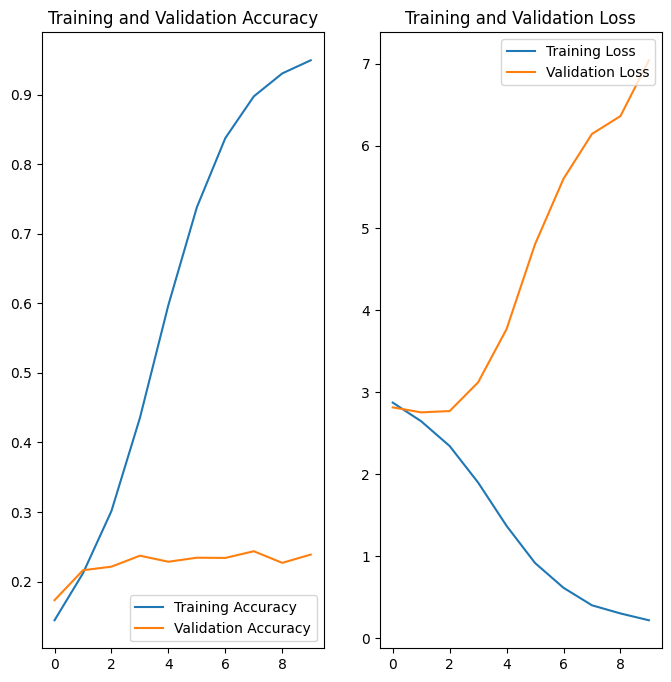

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
fil = "/kaggle/input/dermnet/test/Acne and Rosacea Photos/07RosaceaOK0828063.jpg"

img = tf.keras.utils.load_img(
    fil, target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 182ms/step
This image most likely belongs to Acne and Rosacea Photos with a 100.00 percent confidence.
